<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
                <h1 style="color:blue;text-align:left">Lógica e Inteligencia Artificial</h1>
        </td>
    </tr>
</table>

---

# El mundo del Wumpus

Adaptado de Russell & Norvig (2016).

## Objetivo

En este notebook presentaremos algunos aspectos importantes de la arquitectura necesaria para enfrentar el reto de encontrar el oro en la cueva del Wumpus (sin morir en el intento).

## El mundo del Wumpus

El siguiente problema se conoce como *El mundo del Wumpus* (Yob, 1975), el cual consiste en una caverna muy oscura, representada por una rejilla de $4\times 4$ rodeada de muros. El agente puede entrar y salir de la caberna por la casilla (0,0) y puede percibir solamente lo que hay en cada casilla en la que se encuentre. En la cueva hay pozos muy profundos, en los que puede caer y morir. Lo peor de todo es que hay un mounstro, conocido como el Wumpus, el cual se comerá vivo al agente si este entra a su casilla. ¿Por qué el agente entraría a un lugar como este? ¡Porque en alguna casilla de la cueva hay un montón de oro!

<img src="./imagenes/ejemplo.png" width="250">

El agente puede guiarse por sus sentidos para navegar en la caberna. En cualquier casilla adyacente (no diagonalmente) a un pozo se percibe una brisa; en cualquier casilla adyacente (no diagonalmente) al Wumpus se percibe un hedor; en la casilla donde se encuentra el oro se percibe un brillo. Además, el agente tiene un arco y (lamentablemente) solo una flecha, con la cual puede matar al Wumpus. Cuando se dispare la flecha, esta seguirá en la dirección en que esté mirando el agente hasta golpear un muro o clavarse en el Wumpus, quien morirá arrojando un desgarrador grito "Aaaaaaarrrrgghhhhh".

## Implementación del entorno

In [9]:
import time
from IPython.display import clear_output
from Wumpus import *
%matplotlib inline

[None, None, None, None, None]

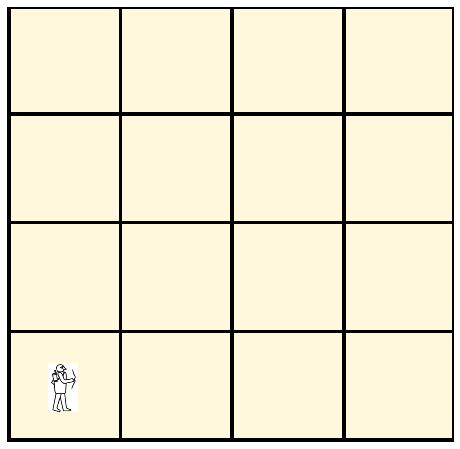

In [17]:
W = wumpus()
W.pintar_casilla()
W.percibir()

[None, None, None, None, None]

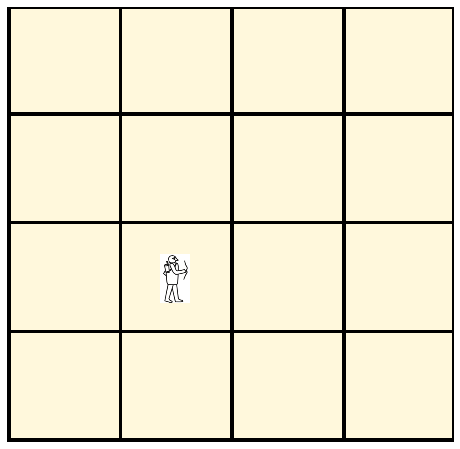

In [19]:
W.transicion('voltearIzquierda')
W.transicion('adelante')
W.pintar_casilla()
W.percibir()

## Planeación de rutas

Uno de los problemas que debe resolver el agente es generar un mapa mental para poder transitar por la caverna. Este mapa mental debe mostrar qué casillas son seguras para pararse en ellas, entre otras cosas.

Además del mapa mental, el agente debe poder utilizarlo para transitar por la caverna sin caer en un pozo o en las fauces del Wumpus. También es importante que pueda trazar una ruta para que, cuando encuentre el oro, pueda devolverse a la salida (casilla inicial) y disfrutar de su botín. Así pues, el primer problema que consideraremos es el de planear una ruta en el mapa mental para ir de un punto $A$, en el cual se está actualmente, a un punto $B$ que se desea acceder. 

En este punto asumiremos que tenemos una lista de casillas seguras para transitar. Más adelante volveremos sobre cómo obtener dicha lista a partir de la información perceptual que el agente va obteniendo a medida que transita por la caverna.

Se inicializa el objeto de búsqueda en la rejilla:

In [20]:
seguras = [(0,0), (0,1), (1,1), (2,1), (2,0), (2,2), (3,2)] 
R = planeadorRuta((2,2), (0,0) , seguras)
print("Estado inicial:", R.estado_inicial)
print("Estado objetivo:", R.estado_objetivo)
print("Movimientos posibles en (2,2):", R.acciones_aplicables((2,2)))

Estado inicial: (2, 2)
Estado objetivo: (0, 0)
Movimientos posibles en (2,2): [(3, 2), (2, 1)]


In [21]:
camino = A_star_search(R)
camino = [(2,2)] + solucion(camino)
acciones = acciones_camino(camino, 'este')
print("El camino a seguir es:", camino)
print("Acciones a ejecutar:", acciones)

El camino a seguir es: [(2, 2), (2, 1), (1, 1), (0, 1), (0, 0)]
Acciones a ejecutar: ['voltearDerecha', 'adelante', 'voltearDerecha', 'adelante', 'adelante', 'voltearIzquierda', 'adelante']


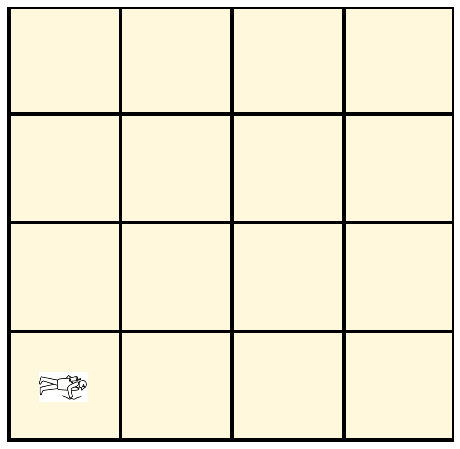

In [23]:
W = wumpus(agente_inicia_en=(2,2), vacio=True)
for accion in acciones:
    clear_output(wait=True)
    W.transicion(accion)
    W.pintar_casilla()
    plt.show()
    time.sleep(1)

---

## Representación del mundo y Toma de decisiones

Para completar una arquitectura de agente funcional para enfrentar el mundo del Wumpus aún faltan muchos pasos. Es necesario usar la lógica para representar el conocimiento que tiene el agente sobre el mundo, tanto en términos de las reglas que rigen el mundo como la información que va obtieniendo a cada paso. También debemos ejecutar razonamientos sobre esta información para crear un mapa mental y saber qué casillas son seguras, en dónde están los posos y el Wumpus. Finalmente, se debe implementar un proceso de toma de decisiones para priorizar algunas acciones sobre otras, por ejemplo, tomar el oro cuando se vea y dirigirse a la salida debe tener prioridad sobre cualquier otro tipo de planeación. Todo esto se encuentra por fuera del alcance de este taller.

Presentamos a continuación un demo de un agente que se enfrenta, así sea muy tímidamente, al mundo del Wumpus:

¡Juego terminado!
Puntaje: 971


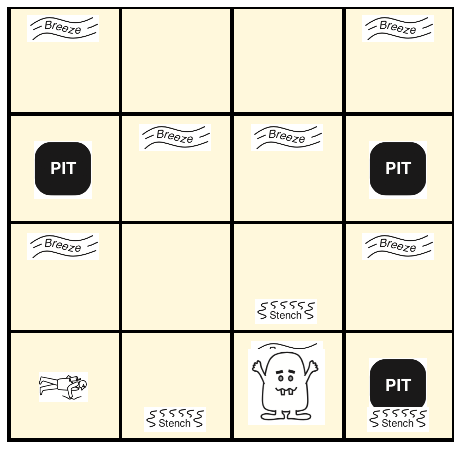

In [24]:
actualizar_codigos()
cods = codigos(4, 4, 6, 50, 4)
# Representación del mundo
# Axioma del fluente TenerFlecha
tenerFlecha0 = cods.F(0, 2)
lista_formulas = formulas_brisa(cods) 
lista_formulas += formulas_hedor(cods)
lista_formulas += formulas_segura(cods)
lista_formulas.append(tenerFlecha0)
# Se inicializa la base de conocimiento
Base_wumpus = lp_query(lista_formulas, cods)
# Se inicializa el mundo
W = wumpus()
plan = []
turno = 0
while W.juego_activo:# and (turno < 20):
    clear_output(wait=True)
    percept = W.percibir()
    accion = hybrid_wumpus_agent(percept, 
                                 turno, 
                                 W.heroe, 
                                 W.direccion, 
                                 Base_wumpus,
                                 plan
                                )
    W.transicion(accion)
    W.pintar_casilla()
    turno += 1
    plt.show()
    time.sleep(.75)

## Referencias

Russell, S. and Norvig, P., 2016. Artificial Intelligence: A Modern Approach. Pearson. Tercera edición. 